## House Prices data taken from kaggle

### problem statement

#### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# I predicted the values using machine learning techniques.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# establishing a connection between my jupiter notebook and the file

In [188]:
import io
%cd "D:\phython\house-prices-advanced-regression-techniques"

D:\phython\house-prices-advanced-regression-techniques


# Importing the data from the train and the test

In [358]:
housetrain=pd.read_csv("train.csv")

In [359]:
housetest=pd.read_csv("test.csv")

# EDA(exploratory data anlaysis)

In [360]:
# exploratory data anlaysis done on train data.

In [363]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [364]:
housetrain.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [365]:
housetrain.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [366]:
housetrain.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [367]:
housetrain.SalePrice.mean()

180921.19589041095

In [368]:
housetrain.SalePrice.median()

163000.0

In [369]:
housetrain.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [370]:
housetrain.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [371]:
housetrain.SalePrice.groupby(housetrain.GarageFinish).mean()

GarageFinish
Fin    240052.690341
RFn    202068.869668
Unf    142156.423140
Name: SalePrice, dtype: float64

In [372]:
housetrain.SalePrice.groupby(housetrain.GarageFinish).median()

GarageFinish
Fin    215000.0
RFn    190000.0
Unf    135000.0
Name: SalePrice, dtype: float64

In [373]:
housetrain.SalePrice.groupby(housetrain.GarageType).median()

GarageType
2Types     159000.0
Attchd     185000.0
Basment    148000.0
BuiltIn    227500.0
CarPort    108000.0
Detchd     129500.0
Name: SalePrice, dtype: float64

In [374]:
housetrain.SalePrice.groupby(housetrain.GarageType).median()

GarageType
2Types     159000.0
Attchd     185000.0
Basment    148000.0
BuiltIn    227500.0
CarPort    108000.0
Detchd     129500.0
Name: SalePrice, dtype: float64

In [375]:
housetrain.SalePrice.groupby(housetrain.GarageType).mean()

GarageType
2Types     151283.333333
Attchd     202892.656322
Basment    160570.684211
BuiltIn    254751.738636
CarPort    109962.111111
Detchd     134091.162791
Name: SalePrice, dtype: float64

In [376]:
housetrain.SalePrice.groupby(housetrain.GarageType).mean()

GarageType
2Types     151283.333333
Attchd     202892.656322
Basment    160570.684211
BuiltIn    254751.738636
CarPort    109962.111111
Detchd     134091.162791
Name: SalePrice, dtype: float64

<AxesSubplot:ylabel='Frequency'>

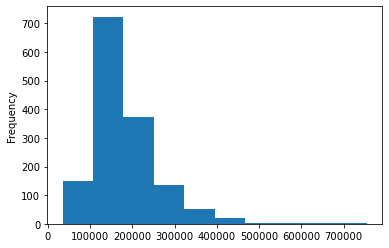

In [538]:
housetrain.SalePrice.plot(kind='hist')

GarageFinish
Fin    AxesSubplot(0.125,0.125;0.775x0.755)
RFn    AxesSubplot(0.125,0.125;0.775x0.755)
Unf    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalePrice, dtype: object

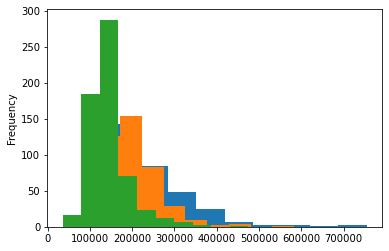

In [539]:
housetrain.SalePrice.groupby(housetrain.GarageFinish).plot(kind='hist')

GarageType
2Types     AxesSubplot(0.125,0.125;0.775x0.755)
Attchd     AxesSubplot(0.125,0.125;0.775x0.755)
Basment    AxesSubplot(0.125,0.125;0.775x0.755)
BuiltIn    AxesSubplot(0.125,0.125;0.775x0.755)
CarPort    AxesSubplot(0.125,0.125;0.775x0.755)
Detchd     AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalePrice, dtype: object

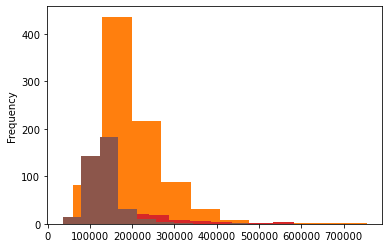

In [540]:
housetrain.SalePrice.groupby(housetrain.GarageType).plot(kind='hist')

In [378]:
# Using shape to understand the data observations and variables
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [379]:
housetrain.isnull().sum().sort_values(ascending=False).head(50)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [380]:
# Added Dependent variable to test Data for Row wise Concatenation
housetest['SalePrice']='test'

# combining the test and training data into a single file Row wise Concatenation

In [381]:
# Row wise concatenation
combinedf=pd.concat([housetrain,housetest],axis=0)

In [382]:
# Split data into ObjectColumns and NumericColumns
objectcolumns=combinedf.select_dtypes(include=['object'])
numericcolumns=combinedf.select_dtypes(include=np.number)

In [383]:
# to know the observation and variables.
print(objectcolumns.shape)
print(numericcolumns.shape)

(2919, 44)
(2919, 37)


# examining null values

In [384]:
objectcolumns.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [385]:
# Since variables - PoolQC,MiscFeature,Alley,Fence, FireplaceQu has morethan
# 50% NA or missing values - impute with word 'missing'
missingcols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

#The missing columns include enormous amounts of missing data, thus I'm replacing missing observations with missing data.

In [386]:
for col in missingcols:
    objectcolumns[col]=objectcolumns[col].fillna("missing")

Creating a for loop to find duplicate categorical values in a dataset

In [387]:
for col in objectcolumns.columns:
    freq=objectcolumns[col].value_counts(dropna=False)
    print(freq)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
missing    2721
Grvl        120
Pave         78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker   

# Because the sales price is a dependent variable (int data type) in the object, converting the file to numeric data is necessary.

In [388]:
numericcolumns['SalePrice']=objectcolumns.SalePrice

In [389]:
numericcolumns.SalePrice.tail()

1454    test
1455    test
1456    test
1457    test
1458    test
Name: SalePrice, dtype: object

In [390]:
# droping the dependent variable from the objectcolumns

In [391]:
objectcolumns=objectcolumns.drop('SalePrice',axis=1)

# Using the simple imputer technique to impute the data's missing values

In [392]:
from sklearn.impute import SimpleImputer

In [393]:
# for categorical data imputation using the simple imputer we use strategy=most_frequent
# for numerical data imputation using the simple imputer  we use strategy=mean,median

In [394]:
imputer=SimpleImputer(strategy="most_frequent")

In [395]:
objectcolumnsimputed=imputer.fit_transform(objectcolumns)

In [396]:
#  after imputation the objectcolumnsimputed data type is changed so we are changing the objectcolumnsimputed data type

In [397]:
objectcolumnsimputed=pd.DataFrame(objectcolumnsimputed,
                                 columns=objectcolumns.columns)

In [400]:
numericcolumns.YrSold=2022-numericcolumns.YrSold

In [401]:
numericcolumns.YrSold

0       14
1       15
2       14
3       16
4       14
        ..
1454    16
1455    16
1456    16
1457    16
1458    16
Name: YrSold, Length: 2919, dtype: int64

In [402]:
# separating the categorical data from the numerical data

In [403]:
categorycolumns=numericcolumns[['OverallQual','OverallCond', 'YearBuilt', 
                                'YearRemodAdd','GarageYrBlt','MoSold']]

In [404]:
numericcolumns=numericcolumns.drop(['OverallQual','OverallCond', 'YearBuilt', 
                                'YearRemodAdd','GarageYrBlt','MoSold'],axis=1)

In [405]:
print(objectcolumnsimputed.shape)
print(categorycolumns.shape)
print(numericcolumns.shape)

(2919, 43)
(2919, 6)
(2919, 32)


In [406]:
#  here i am using the manual imputation to impute the missing data  from the numeric columns

In [407]:
numericcolumns.LotFrontage=numericcolumns.LotFrontage.fillna(
numericcolumns.LotFrontage.median())

In [408]:
for col in numericcolumns.columns.drop('SalePrice'):
    numericcolumns[col]=numericcolumns[col].fillna(
        numericcolumns[col].median())

In [409]:
categorycolumnsimputed=imputer.fit_transform(categorycolumns)

In [410]:
categorycolumnsimputed=pd.DataFrame(categorycolumnsimputed,
                                   columns=categorycolumns.columns)

In [411]:
# importing the lable encoder to convert the categorical data into binary coded form

In [412]:
from sklearn.preprocessing import LabelEncoder

In [413]:
le=LabelEncoder()

In [414]:
objectcolumnsdummy=objectcolumnsimputed.apply(le.fit_transform)

In [415]:
categorycolumnsdummy=categorycolumnsimputed.apply(le.fit_transform)

In [416]:
numericcolumns=numericcolumns.reset_index(drop=True)

In [417]:
objectcolumnsdummy=objectcolumnsdummy.reset_index(drop=True)

In [418]:
categorycolumnsdummy=categorycolumnsdummy.reset_index(drop=True)

In [419]:
combinedfclean=pd.concat([numericcolumns,objectcolumnsdummy,
                          categorycolumnsdummy],axis=1)

#  finding a correlation for the numeric columns

In [420]:
numericcolumns.corr()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,1.000000,0.008931,-0.024710,-0.040746,-0.026737,-0.016988,0.018170,-0.014509,-0.024960,-0.008678,...,-0.010066,-0.008847,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.256050
MSSubClass,0.008931,1.000000,-0.389469,-0.201730,0.006309,-0.064254,-0.072431,-0.125913,-0.219893,-0.248641,...,-0.046564,-0.103389,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,0.015028
LotFrontage,-0.024710,-0.389469,1.000000,0.361426,0.200474,0.201697,0.040330,0.106921,0.330765,0.423217,...,0.290631,0.338014,0.104364,0.151789,0.011039,0.024882,0.069352,0.161025,0.035161,0.007562
LotArea,-0.040746,-0.201730,0.361426,1.000000,0.124728,0.194050,0.084107,0.021400,0.254150,0.332460,...,0.180415,0.213249,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.024234
MasVnrArea,-0.026737,0.006309,0.200474,0.124728,1.000000,0.301427,-0.014580,0.087991,0.393662,0.392367,...,0.357659,0.370945,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,0.017654
BsmtFinSF1,-0.016988,-0.064254,0.201697,0.194050,0.301427,1.000000,-0.055028,-0.477387,0.536471,0.458091,...,0.255510,0.310454,0.223511,0.124191,-0.099690,0.050914,0.096837,0.084465,0.093300,-0.022547
BsmtFinSF2,0.018170,-0.072431,0.040330,0.084107,-0.014580,-0.055028,1.000000,-0.238215,0.089423,0.084389,...,-0.014753,0.003225,0.098462,-0.005805,0.032775,-0.023268,0.063329,0.044530,-0.005130,-0.008867
BsmtUnfSF,-0.014509,-0.125913,0.106921,0.021400,0.087991,-0.477387,-0.238215,1.000000,0.412291,0.296623,...,0.180067,0.164435,-0.039244,0.119804,0.005032,-0.005803,-0.049136,-0.032268,-0.010486,0.038026
TotalBsmtSF,-0.024960,-0.219893,0.330765,0.254150,0.393662,0.536471,0.089423,0.412291,1.000000,0.801638,...,0.437900,0.486021,0.229614,0.245533,-0.085490,0.037897,0.075376,0.072219,0.084005,0.011192
1stFlrSF,-0.008678,-0.248641,0.423217,0.332460,0.392367,0.458091,0.084389,0.296623,0.801638,1.000000,...,0.440452,0.491979,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.013442


In [421]:
# Split Data into train and test
housetraindf=combinedfclean[combinedfclean.SalePrice!='test']
housetestdf=combinedfclean[combinedfclean.SalePrice=='test']

In [422]:
print(housetraindf.shape)
print(housetestdf.shape)

(1460, 81)
(1459, 81)


In [423]:
housetestdf=housetestdf.drop('SalePrice',axis=1)

In [424]:
# here id is a uniquie so i am deleting the variable from the data

In [425]:
housetestdf=housetestdf.drop('Id',axis=1)

In [426]:
y=housetraindf.SalePrice
X=housetraindf.drop(['SalePrice','Id'],axis=1)

In [427]:
y=y.astype('float64')

In [428]:
y.skew()

1.8828757597682129

In [429]:
y.kurt()

6.536281860064529

#   after completion of my EDA and the data preprocessing

#  hypothesis testing 

In [430]:
# On the test data set, hypothesis testing is performed
# There are three different methods of hypothesis testing.

In [432]:
# ttest.
# The ttest is used to compare two variables where one is numeric and the other is a categorical variable with two levels.
# perform hypothesis testing between street and the sales price

In [433]:
housetrain.SalePrice.groupby(housetrain.Street).mean()

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

In [434]:
housetrain.SalePrice.groupby(housetrain.Street).var()

Street
Grvl    4.283212e+09
Pave    6.311762e+09
Name: SalePrice, dtype: float64

In [435]:
sg=housetrain[housetrain.Street=='Grvl']

In [436]:
sp=housetrain[housetrain.Street=='Pave']

In [437]:
from scipy.stats import ttest_ind

In [438]:
ttest_ind(sg.SalePrice,sp.SalePrice,equal_var=False)

Ttest_indResult(statistic=-1.9007878559110067, pvalue=0.11504797250476277)

In [439]:
# here p value is pvalue=0.11504797250476277 .
#  here p value is greater than 0.05 so failed to reject null hypothesis .
# null their is significant difference .
# alter their is no significant difference .
#  failed to reject null hypothesis testing .

In [440]:
# anova test.
# Anova is used to compare two variables, one of which is numeric and the other is a categorical variable with two levels.
# perform hypothesis testing between PavedDrive and the sales price

In [441]:
housetrain.SalePrice.groupby(housetrain.PavedDrive).mean()

PavedDrive
N    115039.122222
P    132330.000000
Y    186433.973881
Name: SalePrice, dtype: float64

In [442]:
housetrain.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [443]:
y1=housetrain[housetrain.PavedDrive=='Y']
n=housetrain[housetrain.PavedDrive=='N']
p=housetrain[housetrain.PavedDrive=='P']

In [444]:
from scipy.stats import f_oneway

In [445]:
f_oneway(y1.SalePrice,n.SalePrice,p.SalePrice)
# here p value is pvalue=1.803568890651533e-18 .
# null their is no significant difference .
# alter their is significant difference .
# reject null hypothesis testing .

F_onewayResult(statistic=42.02417941762533, pvalue=1.803568890651533e-18)

In [446]:
# chisquaretest.
# For both categorical and continuous variables, the chisquare test is used .
# perform hypothesis testing between Fence and the MiscFeature .

In [447]:
housetrain.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [448]:
housetrain.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [449]:
pd.crosstab(housetrain.Fence,housetrain.MiscFeature)

MiscFeature,Shed,TenC
Fence,,
GdPrv,5,0
GdWo,4,0
MnPrv,13,1
MnWw,1,0


In [450]:
from scipy.stats import chi2_contingency

In [451]:
chi2_contingency(pd.crosstab(housetrain.Fence,housetrain.MiscFeature))

(0.7453416149068322,
 0.8624908016956859,
 3,
 array([[ 4.79166667,  0.20833333],
        [ 3.83333333,  0.16666667],
        [13.41666667,  0.58333333],
        [ 0.95833333,  0.04166667]]))

In [452]:
# here p value is pvalue=0.8624908016956859.
# null their is no significant difference .
# alter their is significant difference .
# failed to reject null hypothesis testing .

#  sutudy of dependent variable

In [453]:
#  her the dependent variable is in numeric continues  and  it is in normal distribution from 
# having a outliers in the maximum side (as per the box plot of my dependent variable )
# the dependet variable conatins positive  skewness and positive kurtosis
#  for postive skewness in the dependent variable we use Logarthemic Transformation

In [454]:
# Create Histogram, boxplot and density curve for dependent variabe y

<AxesSubplot:ylabel='Frequency'>

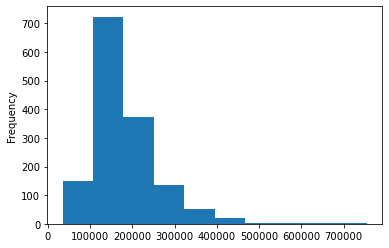

In [455]:
y.plot(kind='hist')

<AxesSubplot:>

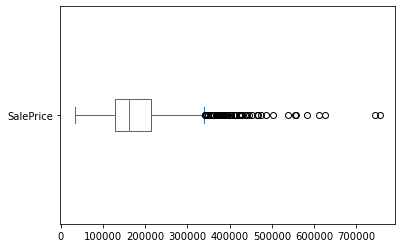

In [456]:
y.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

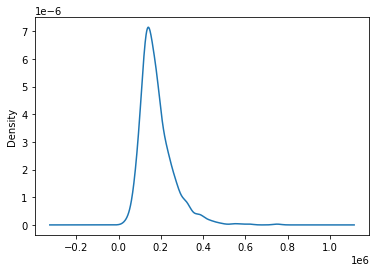

In [457]:
y.plot(kind='density')

<AxesSubplot:>

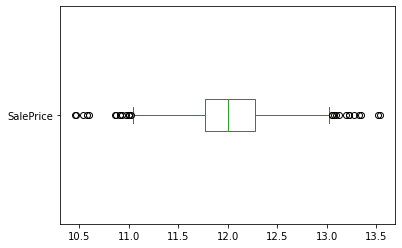

In [458]:
# Positive Skewness - Logarthemic Transformation

np.log(y).plot(kind='box',vert=False)

# here the dependent variable is in numeric form continues and it is in the normal distribution form .
# so i used to perform the regression machine learning techiniques

In [459]:
# under regression models in machine learning
# 1.Linear regression
# 2.decission treee
# 3.Random forest regression
# 4.gradient bossting regression

# linear regression¶

In [460]:
from sklearn.linear_model import LinearRegression

In [461]:
reg=LinearRegression()

In [462]:
regmodel=reg.fit(X,y)

In [463]:
regmodel.score(X,y) # R Square 0.60 - 0.95

0.8545634224507179

In [464]:
regtestpredict=regmodel.predict(housetestdf)

In [465]:
regtestpredict

array([106189.76326881, 156987.78817192, 167242.08767411, ...,
       143662.33304422, 115297.31625419, 242815.16584994])

In [466]:
lertr=regmodel.predict(X)

In [467]:
regres=y-lertr

In [468]:
np.sqrt(np.mean(regres**2))

30285.933156831714

In [469]:
#pd.DataFrame(regtestpredict).to_csv("reg.csv") # write test predictions -csv

# Impact of Logarthmic Transformation in linear regression

In [470]:

regmodel2=reg.fit(X,np.log(y))

In [471]:
regmodel2.score(X,np.log(y))

0.8878960435064192

In [472]:
lertrlog=regmodel2.predict(X)

In [473]:
lertrlog=np.exp(lertrlog)

In [474]:
regreslog=y-lertrlog

In [475]:
np.sqrt(np.mean(regreslog**2))

31849.80642221831

In [476]:
reglogpredict=regmodel2.predict(housetestdf)

In [477]:
np.exp(reglogpredict)

array([116427.50595598, 156670.35705991, 166136.43801705, ...,
       153094.51135758, 116083.49210687, 241087.06424904])

In [478]:
#pd.DataFrame(np.exp(reglogpredict)).to_csv("reglog.csv")

# decision tree regressor

In [479]:
from sklearn.tree import DecisionTreeRegressor

In [480]:
tree=DecisionTreeRegressor(max_depth=6)

In [481]:
treemodel=tree.fit(X,y)

In [482]:
treemodel.score(X,y)

0.9062567454058851

In [483]:
tretrore=treemodel.predict(X)

In [484]:
treres=y-tretrore

In [485]:
np.sqrt(np.mean(treres**2))

24314.993070689074

In [486]:
treepredict=treemodel.predict(housetestdf)

In [487]:
treepredict

array([128881.04487179, 141044.80645161, 177793.80203046, ...,
       141044.80645161, 109902.06097561, 195035.71428571])

In [488]:
#pd.DataFrame(treepredict).to_csv("tree.csv")

# Impact of Logarthmic Transformation in decision tree regressor

In [489]:
dctreelog=tree.fit(X,np.log(y))

In [490]:
dctreelog.score(X,np.log(y))

0.8865720049066539

In [491]:
dctrepretr=dctreelog.predict(X)

In [492]:
dtrestr=y-dctrepretr

In [493]:
np.sqrt(np.mean(dtrestr**2))

197572.42461482942

In [494]:
treepredictlog=dctreelog.predict(housetestdf)

In [495]:
treepredictlog=np.exp(treepredictlog)

In [496]:
#pd.DataFrame(treepredictlog).to_csv('dttreelog.csv')

# decision tree polt tree

In [497]:
from sklearn.tree import plot_tree

In [498]:
tree2=DecisionTreeRegressor(max_depth=3)

In [499]:
tree2model=tree2.fit(X,y)

[Text(0.5, 0.875, 'OverallQual <= 6.5\nsquared_error = 6306788585.349\nsamples = 1460\nvalue = 180921.196'),
 Text(0.25, 0.625, 'OverallQual <= 5.5\nsquared_error = 2426928665.05\nsamples = 1231\nvalue = 157832.433'),
 Text(0.125, 0.375, 'GrLivArea <= 1378.5\nsquared_error = 1411538921.037\nsamples = 912\nvalue = 140383.976'),
 Text(0.0625, 0.125, 'squared_error = 837746927.031\nsamples = 564\nvalue = 124907.778'),
 Text(0.1875, 0.125, 'squared_error = 1324189529.34\nsamples = 348\nvalue = 165466.089'),
 Text(0.375, 0.375, 'GrLivArea <= 1941.0\nsquared_error = 1971049955.987\nsamples = 319\nvalue = 207716.423'),
 Text(0.3125, 0.125, 'squared_error = 1243894899.002\nsamples = 239\nvalue = 194238.745'),
 Text(0.4375, 0.125, 'squared_error = 1979517700.562\nsamples = 80\nvalue = 247980.988'),
 Text(0.75, 0.625, 'OverallQual <= 7.5\nsquared_error = 8893038849.977\nsamples = 229\nvalue = 305035.9'),
 Text(0.625, 0.375, 'GrLivArea <= 1971.5\nsquared_error = 4058765722.773\nsamples = 168\nval

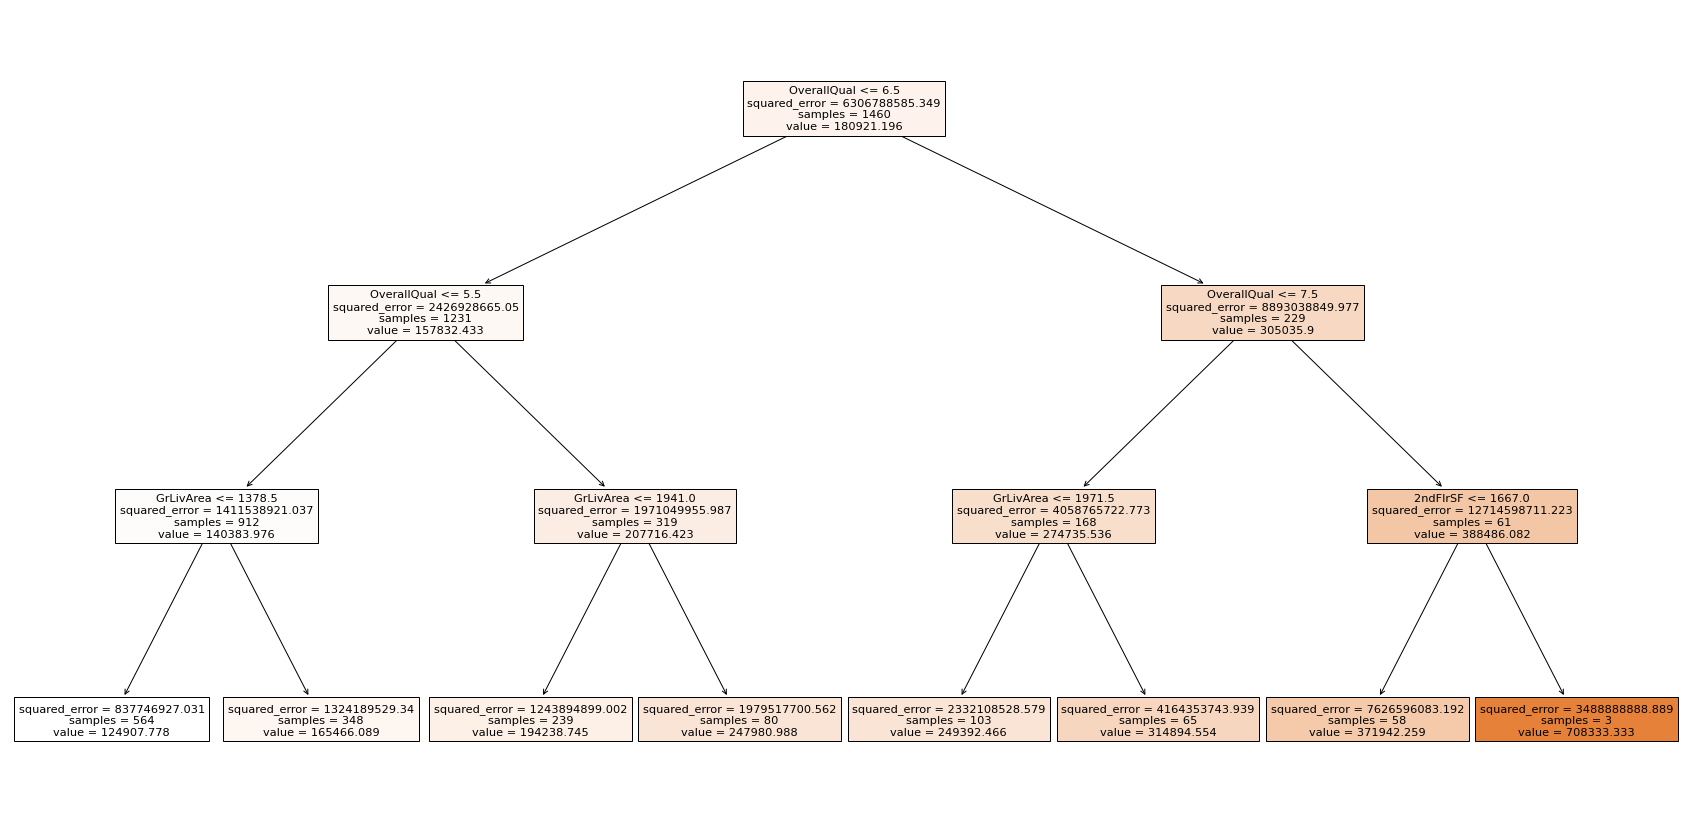

In [500]:
plt.figure(figsize=(30,15))
plot_tree(tree2model,feature_names=X.columns,filled=True)

# Random forest regression 

In [501]:
# for  bagging method  we use randorm forest regression in python

In [502]:
from sklearn.ensemble import RandomForestRegressor

In [503]:
RF=RandomForestRegressor(n_estimators=3000)

In [504]:
RFmodel=RF.fit(X,y)

In [505]:
RFmodel.score(X,y)

0.982346173267018

In [506]:
rfmodelpre=RFmodel.predict(X)

In [507]:
rfress=y-rfmodelpre

In [508]:
np.sqrt(np.mean(rfress**2))

10551.727485454909

In [509]:
RFpredict=RFmodel.predict(housetestdf)

In [510]:
RFpredict

array([126096.38666667, 154679.43966667, 180108.87133333, ...,
       151793.379     , 115044.689     , 227318.90566667])

In [511]:
#pd.DataFrame(RFpredict).to_csv("RF.csv")

# Impact of Logarthmic Transformation in Random forest regression 

In [512]:
RFmodellog=RF.fit(X,np.log(y))

In [513]:
RFmodellog.score(X,np.log(y))

0.9834567001817225

In [514]:
rfmodelprelog=RFmodellog.predict(X)

In [515]:
rfmodelprelog=np.exp(rfmodelprelog)

In [516]:
rfresslog=y-rfmodelprelog

In [517]:
np.sqrt(np.mean(rfresslog**2))

10795.058177442188

In [518]:
RFpredictlog=RFmodellog.predict(housetestdf)

In [519]:
RFpredictlog=np.exp(RFpredictlog)

In [520]:
#pd.DataFrame(RFpredictlog).to_csv("RFlog.csv")

# GradientBoostingRegressor

In [521]:
# for  bosting method  we use  GradientBoostingRegressor in python

In [522]:
from sklearn.ensemble import GradientBoostingRegressor

In [523]:
gbm=GradientBoostingRegressor(n_estimators=5000)

In [524]:
gbmmodel=gbm.fit(X,y)

In [525]:
gbmmodel.score(X,y)

0.9999986515738404

In [526]:
gbmpredict=gbmmodel.predict(housetestdf)

In [527]:
gbmpredict

array([114008.68613965, 166205.49685935, 190916.05024479, ...,
       163683.74826769, 107503.90879008, 235733.40704988])

In [528]:
#pd.DataFrame(gbmpredict).to_csv("gbm1.csv")

# Impact of Logarthmic Transformation in GradientBoostingRegressor

In [529]:
gbm1=GradientBoostingRegressor(n_estimators=991,max_depth=3)

In [530]:
gbmo=gbm1.fit(X,np.log(y))

In [531]:
gbmo.score(X,np.log(y))

0.9970237140610402

In [532]:
gbmpredict1=gbmo.predict(housetestdf)

In [533]:
gbmpredict1=np.exp(gbmpredict1)

In [534]:
pd.DataFrame(gbmpredict1).to_csv("gbmlog991adjusted.csv")

# I started updating the expected values of test data in the kaggle after I finished my model predictions.

# The logarithmic transformation of the dependant variable in the gradient bosting approach provides me the best score, according to my Kaggle score.

In [535]:
kaggle=pd.read_csv('kaggle prediction file.csv')

In [536]:
kaggle

,model,score
0,linear regg,0.356720
1,linear log regg,0.141730
2,dectree with maxdepth,0.206190
3,dctree norml,0.209730
4,dttree log,0.207070
5,dtree treemaxdepth is 6,0.210710
6,random forest,0.146640
7,rf on 3000,0.145910
8,gbm 3000,0.132724
9,gbm5000,0.137960


In [537]:
min(kaggle.score)

0.13214

# In Kaggle, I received a rank of 1074 for an rmse of 0.13214, and the gradient bosting approach provided me with the highest score.

In [543]:
# tottally updated one